In [2]:
import pandas as pd
import numpy as np
import mysql.connector
from mysql.connector import Error

In [3]:
import pymysql

user = 'root'
passw = 'password'
host =  'localhost'
port = 3306
database = 'retail_sales'

connection = pymysql.connect(host=host,port=port,user=user,passwd=passw,db=database,charset='utf8')
cursor = connection.cursor()

In [4]:
sql = "SELECT * FROM quarter1"
try:
   # Execute the SQL command
   cursor.execute(sql)
   # Fetch all the rows in a list of lists.
   results = cursor.fetchall()
   for row in results:
      year = row[0]
      quarter = row[1]
      sales = row[2]
      # Now print fetched result
      print ("year= %d,quarter = %d ,sales = %.2f" % \
         (year,quarter,sales))
except:
   print ("Error: unable to fetch data")


year= 2014,quarter = 1 ,sales = 74447.80
year= 2015,quarter = 1 ,sales = 68851.70
year= 2016,quarter = 1 ,sales = 93237.20
year= 2017,quarter = 1 ,sales = 123145.00
year= 2014,quarter = 2 ,sales = 86538.80
year= 2015,quarter = 2 ,sales = 89124.20
year= 2016,quarter = 2 ,sales = 136082.00
year= 2017,quarter = 2 ,sales = 133764.00
year= 2014,quarter = 3 ,sales = 143633.00
year= 2015,quarter = 3 ,sales = 130260.00
year= 2016,quarter = 3 ,sales = 143787.00
year= 2017,quarter = 3 ,sales = 196252.00
year= 2014,quarter = 4 ,sales = 179628.00
year= 2015,quarter = 4 ,sales = 182297.00
year= 2016,quarter = 4 ,sales = 236099.00
year= 2017,quarter = 4 ,sales = 280054.00


In [5]:
print(results)


((2014, 1, 74447.8), (2015, 1, 68851.7), (2016, 1, 93237.2), (2017, 1, 123145.0), (2014, 2, 86538.8), (2015, 2, 89124.2), (2016, 2, 136082.0), (2017, 2, 133764.0), (2014, 3, 143633.0), (2015, 3, 130260.0), (2016, 3, 143787.0), (2017, 3, 196252.0), (2014, 4, 179628.0), (2015, 4, 182297.0), (2016, 4, 236099.0), (2017, 4, 280054.0))


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_sql_query("select * from quarter1;", connection)

In [8]:
df

,year,quarter,sales
0,2014,1,74447.8
1,2015,1,68851.7
2,2016,1,93237.2
3,2017,1,123145.0
4,2014,2,86538.8
5,2015,2,89124.2
6,2016,2,136082.0
7,2017,2,133764.0
8,2014,3,143633.0
9,2015,3,130260.0


In [9]:
df.describe()


,year,quarter,sales
count,16.000000,16.000000,16.000000
mean,2015.500000,2.500000,143575.043750
std,1.154701,1.154701,59229.757625
min,2014.000000,1.000000,68851.700000
25%,2014.750000,1.750000,92208.950000
50%,2015.500000,2.500000,134923.000000
75%,2016.250000,3.250000,180295.250000
max,2017.000000,4.000000,280054.000000


In [10]:
df.head()


,year,quarter,sales
0,2014,1,74447.8
1,2015,1,68851.7
2,2016,1,93237.2
3,2017,1,123145.0
4,2014,2,86538.8


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
year       16 non-null int64
quarter    16 non-null int64
sales      16 non-null float64
dtypes: float64(1), int64(2)
memory usage: 464.0 bytes


In [12]:
df.columns

Index(['year', 'quarter', 'sales'], dtype='object')

/home/kavya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


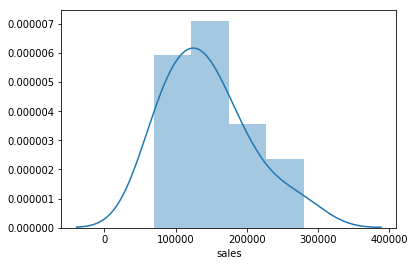

In [13]:
sns.distplot(df['sales'])

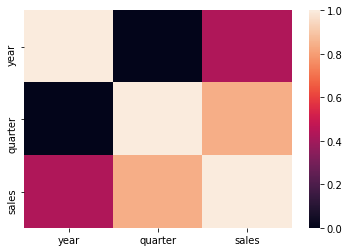

In [14]:
sns.heatmap(df.corr())

# # Training a linear regression model

# x and y arrays

In [15]:
X = df[['year','quarter']]
y = df['sales']

In [16]:
X.shape

(16, 2)

# Test train split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Creation and training the model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
# print the intercept
print(lm.intercept_)

-43803908.76781603


In [23]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
year,21738.858621
quarter,53419.965517


In [24]:
predictions = lm.predict(X_test)

In [25]:
predictions

array([213571.21494252,  75050.17701148,  96789.03563218, 191832.35632183,
       181890.10804597, 106731.28390804,  31572.45977011])

In [26]:
test_pred_df = pd.DataFrame( { 'actual': y_test,
                            'predicted': np.round( predictions, 2),
                            'residuals': y_test - predictions })

In [27]:
test_pred_df


,actual,predicted,residuals
13,182297.0,213571.21,-31274.214943
2,93237.2,75050.18,18187.022989
3,123145.0,96789.04,26355.964368
12,179628.0,191832.36,-12204.356322
10,143787.0,181890.11,-38103.108046
5,89124.2,106731.28,-17607.083908
0,74447.8,31572.46,42875.340230


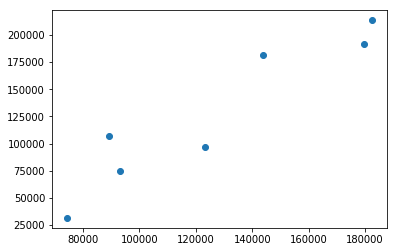

In [28]:
plt.scatter(y_test,predictions)

/home/kavya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


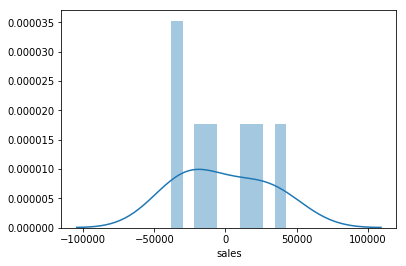

In [29]:
sns.distplot((y_test-predictions),bins=10);

In [30]:
from sklearn import metrics

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 26658.15582922782
MSE: 821796934.6829398
RMSE: 28667.000796786186


In [32]:
print('Linear Regression R squared": %.4f' % lm.score(X_test, y_test))

Linear Regression R squared": 0.4980


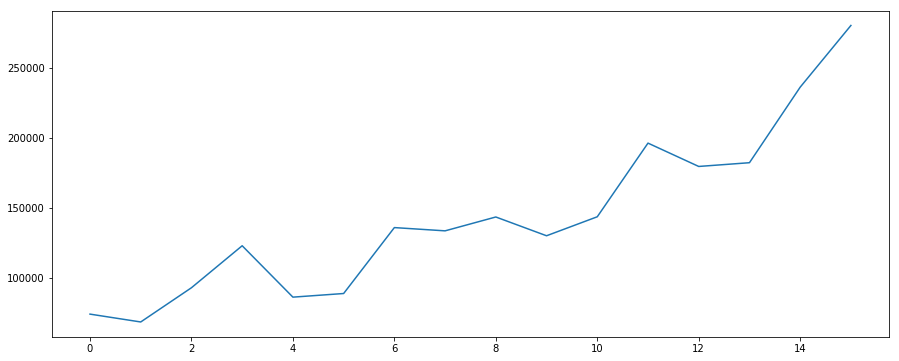

In [33]:
y.plot(figsize=(15, 6))
plt.show()

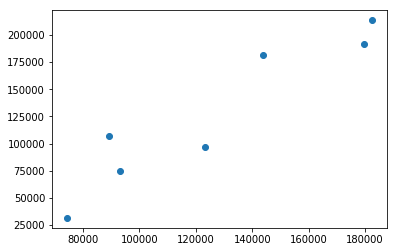

In [34]:
plt.scatter(y_test,predictions)

In [35]:
import pickle
# Save to file in the current working directory
pkl_filename = "model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(lm, file)

# Prediction

In [36]:
import pickle
import array as arr
import numpy as np
from itertools import repeat

filename='model.pkl'

#year = input("Enter year: ")
#quarter = input("Enter quarter: ")
input_arr = [[2018,1],[2019,1],[2020,1],[2018,2],[2019,2],[2020,2],[2018,3],[2019,3],[2020,3],[2018,4],[2019,4],[2020,4]]

#load the model from disk
model = pickle.load(open(filename, 'rb'))
res = model.predict(np.array(input_arr,dtype='float64'))
print("sales: ",res)

sales:  [118527.89425287 140266.75287355 162005.61149424 171947.85977011
 193686.7183908  215425.57701149 225367.82528735 247106.68390804
 268845.54252873 278787.79080459 300526.64942528 322265.50804597]


In [37]:
data = pd.DataFrame(input_arr)

In [38]:
data

,0,1
0,2018,1
1,2019,1
2,2020,1
3,2018,2
4,2019,2
5,2020,2
6,2018,3
7,2019,3
8,2020,3
9,2018,4


In [39]:
import pickle
import array as arr
import numpy as np

filename='model.pkl'
model = pickle.load(open(filename, 'rb'))
res = model.predict(data)
print(res)

[118527.89425287 140266.75287355 162005.61149424 171947.85977011
 193686.7183908  215425.57701149 225367.82528735 247106.68390804
 268845.54252873 278787.79080459 300526.64942528 322265.50804597]


In [40]:
i = 0
list = []
while i < res.size:
    list.append(res[i])
    i=i+1
sales_df = pd.DataFrame(list)

In [41]:
sales_df

,0
0,118527.894253
1,140266.752874
2,162005.611494
3,171947.859770
4,193686.718391
5,215425.577011
6,225367.825287
7,247106.683908
8,268845.542529
9,278787.790805


In [42]:
frames = [data,sales_df]
result = pd.concat(frames, axis=1, sort=False)
result.columns = ["year", "quarter", "sales"]
result

,year,quarter,sales
0,2018,1,118527.894253
1,2019,1,140266.752874
2,2020,1,162005.611494
3,2018,2,171947.859770
4,2019,2,193686.718391
5,2020,2,215425.577011
6,2018,3,225367.825287
7,2019,3,247106.683908
8,2020,3,268845.542529
9,2018,4,278787.790805


In [43]:
df2 = df.append(result)

In [44]:
df2

,year,quarter,sales
0,2014,1,74447.800000
1,2015,1,68851.700000
2,2016,1,93237.200000
3,2017,1,123145.000000
4,2014,2,86538.800000
5,2015,2,89124.200000
6,2016,2,136082.000000
7,2017,2,133764.000000
8,2014,3,143633.000000
9,2015,3,130260.000000


In [45]:
df3=df2.groupby(['year','quarter'])
print(df3['sales'].aggregate(np.sum))

year  quarter
2014  1           74447.800000
      2           86538.800000
      3          143633.000000
      4          179628.000000
2015  1           68851.700000
      2           89124.200000
      3          130260.000000
      4          182297.000000
2016  1           93237.200000
      2          136082.000000
      3          143787.000000
      4          236099.000000
2017  1          123145.000000
      2          133764.000000
      3          196252.000000
      4          280054.000000
2018  1          118527.894253
      2          171947.859770
      3          225367.825287
      4          278787.790805
2019  1          140266.752874
      2          193686.718391
      3          247106.683908
      4          300526.649425
2020  1          162005.611494
      2          215425.577011
      3          268845.542529
      4          322265.508046
Name: sales, dtype: float64


In [46]:
plot_result1= df3['sales'].aggregate(np.sum).unstack()
df4=plot_result1
df4

quarter,1,2,3,4
year,,,,
2014,74447.800000,86538.800000,143633.000000,179628.000000
2015,68851.700000,89124.200000,130260.000000,182297.000000
2016,93237.200000,136082.000000,143787.000000,236099.000000
2017,123145.000000,133764.000000,196252.000000,280054.000000
2018,118527.894253,171947.859770,225367.825287,278787.790805
2019,140266.752874,193686.718391,247106.683908,300526.649425
2020,162005.611494,215425.577011,268845.542529,322265.508046


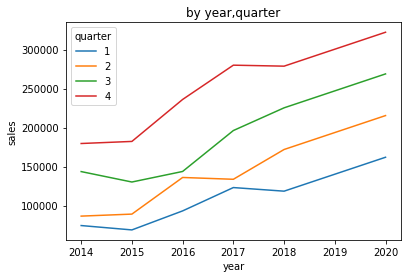

In [47]:
plot_result1.plot(kind ='line', title = 'by year,quarter')
plt.ylabel('sales')
plt.show()

In [48]:
plot_result1= df3['sales'].aggregate(np.sum).unstack()
print(plot_result1)

quarter              1              2              3              4
year                                                               
2014      74447.800000   86538.800000  143633.000000  179628.000000
2015      68851.700000   89124.200000  130260.000000  182297.000000
2016      93237.200000  136082.000000  143787.000000  236099.000000
2017     123145.000000  133764.000000  196252.000000  280054.000000
2018     118527.894253  171947.859770  225367.825287  278787.790805
2019     140266.752874  193686.718391  247106.683908  300526.649425
2020     162005.611494  215425.577011  268845.542529  322265.508046


In [49]:
plot_result2=plot_result1.pct_change()*100

In [50]:
plot_result2

quarter,1,2,3,4
year,,,,
2014,NaN,NaN,NaN,NaN
2015,-7.516810,2.987562,-9.310534,1.485849
2016,35.417426,52.688047,10.384615,29.513377
2017,32.077111,-1.703385,36.488000,18.617190
2018,-3.749325,28.545692,14.835938,-0.452130
2019,18.340711,12.642704,9.645946,7.797637
2020,15.498226,11.223722,8.797358,7.233588


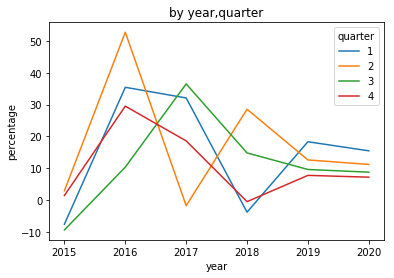

In [51]:
plot_result2.plot(kind ='line', title = 'by year,quarter')
plt.ylabel('percentage')
plt.show()

In [52]:
df4

quarter,1,2,3,4
year,,,,
2014,74447.800000,86538.800000,143633.000000,179628.000000
2015,68851.700000,89124.200000,130260.000000,182297.000000
2016,93237.200000,136082.000000,143787.000000,236099.000000
2017,123145.000000,133764.000000,196252.000000,280054.000000
2018,118527.894253,171947.859770,225367.825287,278787.790805
2019,140266.752874,193686.718391,247106.683908,300526.649425
2020,162005.611494,215425.577011,268845.542529,322265.508046


In [54]:
df4.pct_change()*100

quarter,1,2,3,4
year,,,,
2014,NaN,NaN,NaN,NaN
2015,-7.516810,2.987562,-9.310534,1.485849
2016,35.417426,52.688047,10.384615,29.513377
2017,32.077111,-1.703385,36.488000,18.617190
2018,-3.749325,28.545692,14.835938,-0.452130
2019,18.340711,12.642704,9.645946,7.797637
2020,15.498226,11.223722,8.797358,7.233588
